 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import os
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csv = '../Homework/Resources/whale_returns.csv'
whale = pd.read_csv (whale_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)


In [3]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_clean = whale.dropna()
whale_clean.drop_duplicates()
whale_clean.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_csv = '../Homework/Resources/algo_returns.csv'
algo = pd.read_csv (algo_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)



In [6]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_clean = algo.dropna()
algo_clean.drop_duplicates()
algo_clean.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = '../Homework/Resources/sp500_history.csv'
sp500 = pd.read_csv (sp500_history_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500.head(10)

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
2019-04-15,$2905.58
2019-04-12,$2907.41
2019-04-11,$2888.32
2019-04-10,$2888.21


In [9]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500['Close'] = sp500['Close'].str.replace('$','')

/var/folders/jk/xsphk5ys6z9_3mpy5dqxn43r0000gn/T/ipykernel_3057/2540243966.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500['Close'] = sp500['Close'].str.replace('$','')


In [11]:
# Calculate Daily Returns
sp500daily = sp500.astype(float).pct_change()
sp500daily.sort_index(ascending=True)
sp500daily.head()


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
sp500_daily_clean = sp500daily.dropna()
sp500_daily_clean.drop_duplicates()
sp500_daily_clean.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_clean = sp500_daily_clean.rename(columns={'Close': 'SP500 Close'})
sp500_daily_clean.head(10)

,SP500 Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
2019-04-12,0.000630
2019-04-11,-0.006566
2019-04-10,-0.000038
2019-04-09,-0.003466


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
bigdf = pd.concat([sp500_daily_clean, algo_clean, whale_clean], axis='columns', join='inner')
bigdf.head()

,SP500 Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

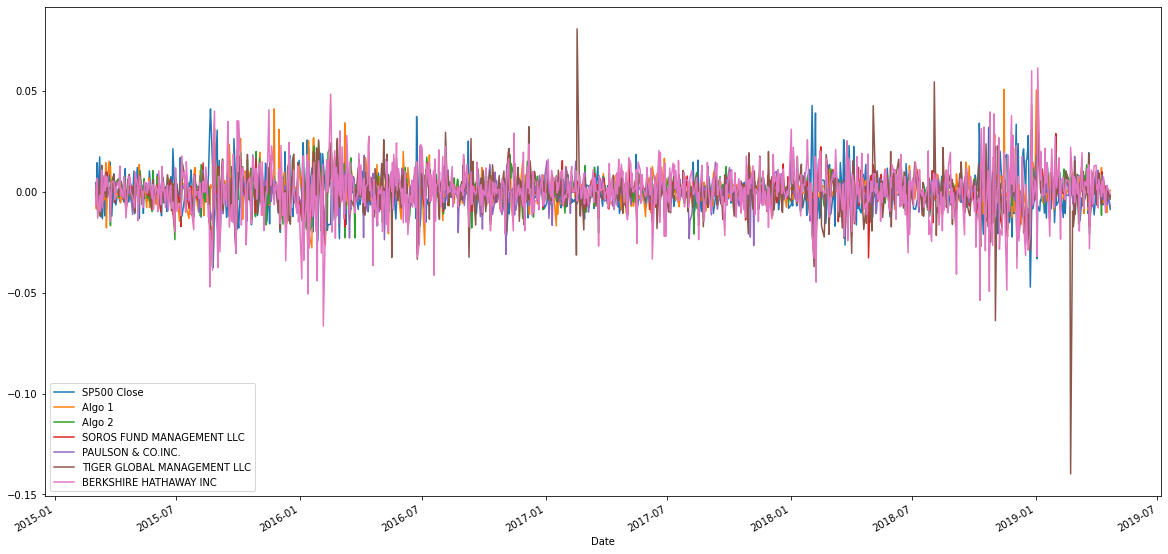

In [15]:
# Plot daily returns of all portfolios
bigdf.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

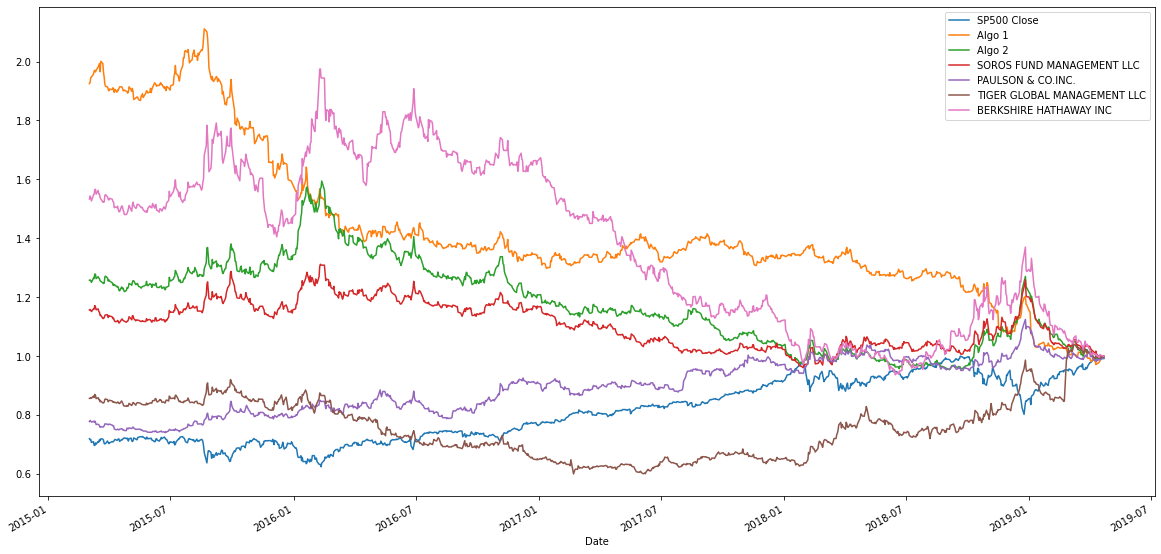

In [16]:
# Calculate cumulative returns of all portfolios
cumulative = (1 + bigdf).cumprod()
# Plot cumulative returns
cumulative.plot(figsize=(20,10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

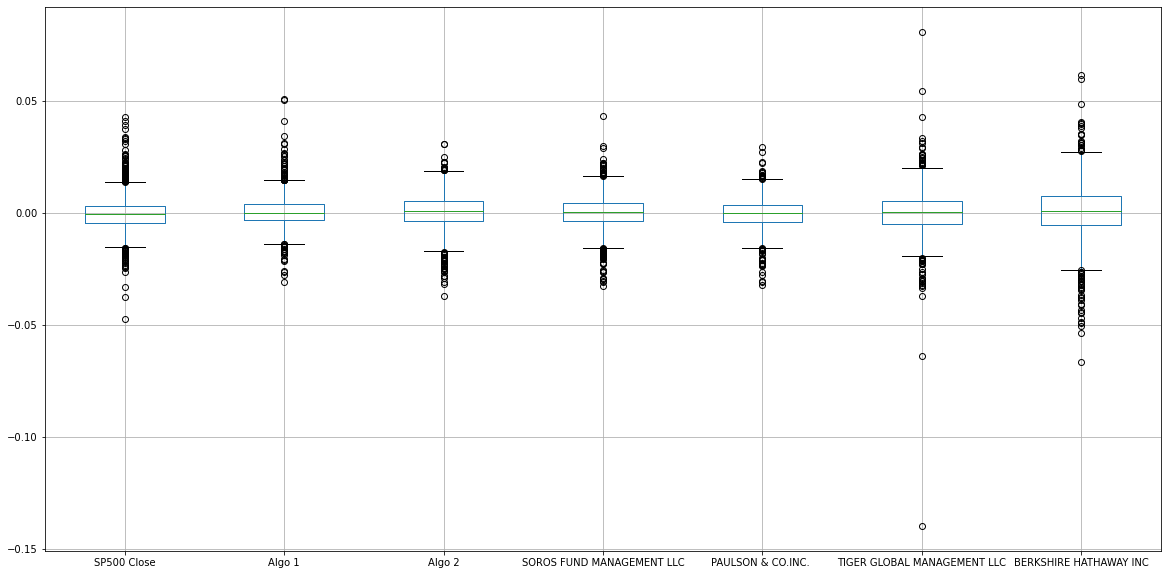

In [17]:
# Box plot to visually show risk
bigdf.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
bigdf.std()

SP500 Close                    0.008587
Algo 1                         0.007623
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_clean.std()

SP500 Close    0.008135
dtype: float64

In [20]:
# Determine which portfolios are riskier than the S&P 500
print(f"You can see that there are two portfolios that have a higher risk factor than the SP500 these would be TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC")

You can see that there are two portfolios that have a higher risk factor than the SP500 these would be TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC


### Calculate the Annualized Standard Deviation

SP500 Close                    0.136313
Algo 1                         0.121006
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

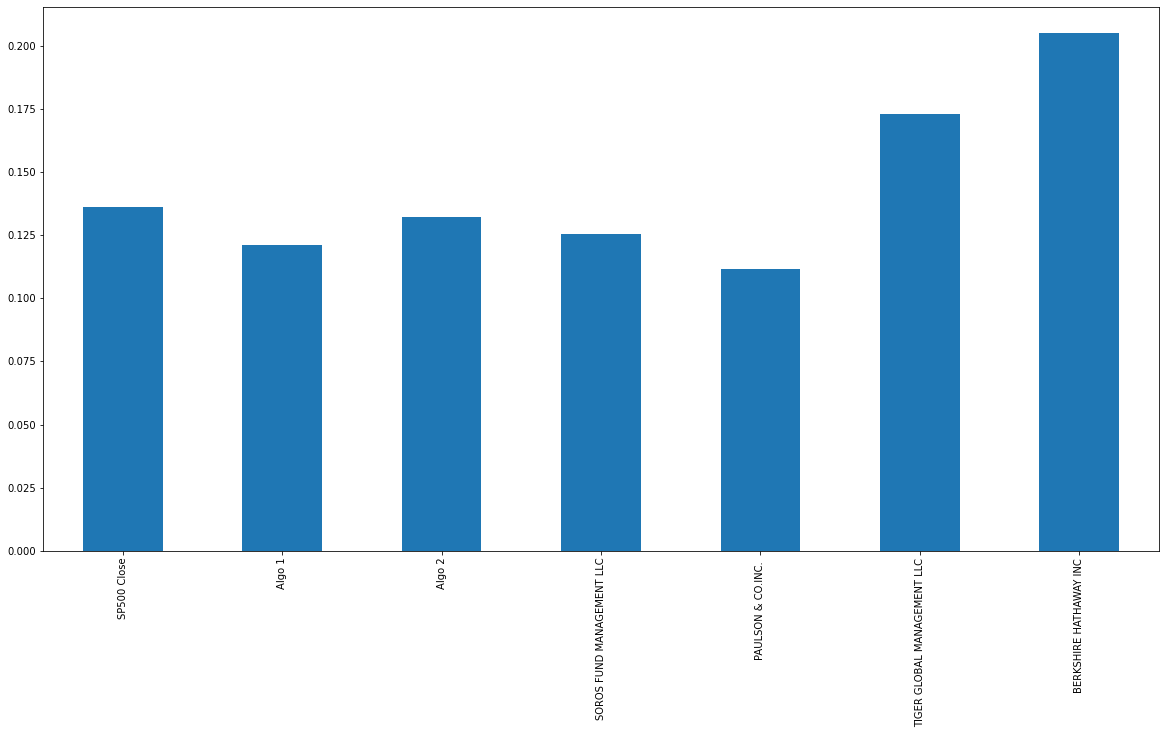

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_deviation =(bigdf.var()*252)
annualized_standard = np.sqrt(annualized_deviation)
annualized_standard.plot(kind=('bar'), figsize=(20,10))
annualized_standard

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

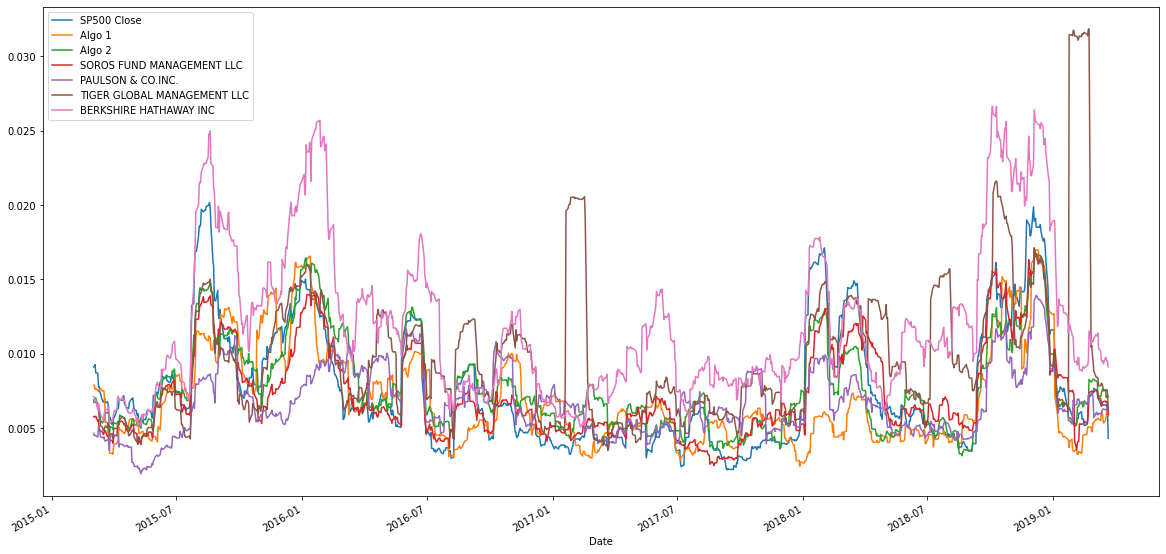

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
bigdf.rolling(window=21).std().plot(figsize=(20,10))
# Plot the rolling standard deviation


### Calculate and plot the correlation

,SP500 Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SP500 Close,1.000000,-0.033963,-0.002192,0.000574,0.013549,-0.001505,-0.013856
Algo 1,-0.033963,1.000000,0.287852,0.320901,0.268631,0.164114,0.291678
Algo 2,-0.002192,0.287852,1.000000,0.826730,0.678085,0.507160,0.687756
SOROS FUND MANAGEMENT LLC,0.000574,0.320901,0.826730,1.000000,0.699823,0.561040,0.754157
PAULSON & CO.INC.,0.013549,0.268631,0.678085,0.699823,1.000000,0.434308,0.545451
TIGER GLOBAL MANAGEMENT LLC,-0.001505,0.164114,0.507160,0.561040,0.434308,1.000000,0.424125
BERKSHIRE HATHAWAY INC,-0.013856,0.291678,0.687756,0.754157,0.545451,0.424125,1.000000


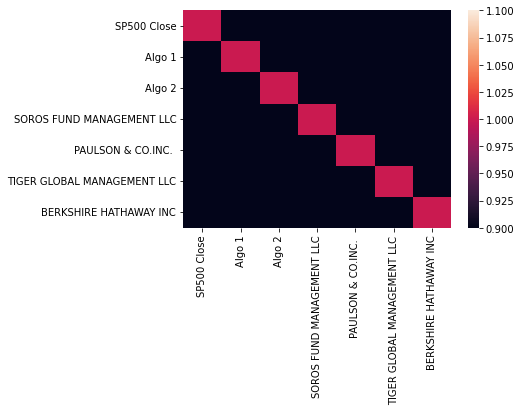

In [23]:
# Calculate the correlation
correlation = bigdf.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=1, vmax=1)
correlation

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [56]:
# Calculate covariance of a single portfolio
covariance = bigdf['TIGER GLOBAL MANAGEMENT LLC'].cov(bigdf['SP500 Close'])
covariance


-1.4081131271818422e-07

In [57]:
# Calculate variance of S&P 500
variance = bigdf['SP500 Close'].var()
variance

7.373467552840446e-05

In [58]:
# Computing beta
tiger_beta = covariance/variance
tiger_beta

-0.0019097027512373081

In [60]:
# Plot beta trend
cov_rolling = bigdf['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(bigdf['SP500 Close'])
var_rolling = bigdf['SP500 Close'].rolling(window=60).var()

<AxesSubplot:title={'center':'TIGER GLOBAL MANAGEMENT LLC vs SP500 Close'}, xlabel='Date'>

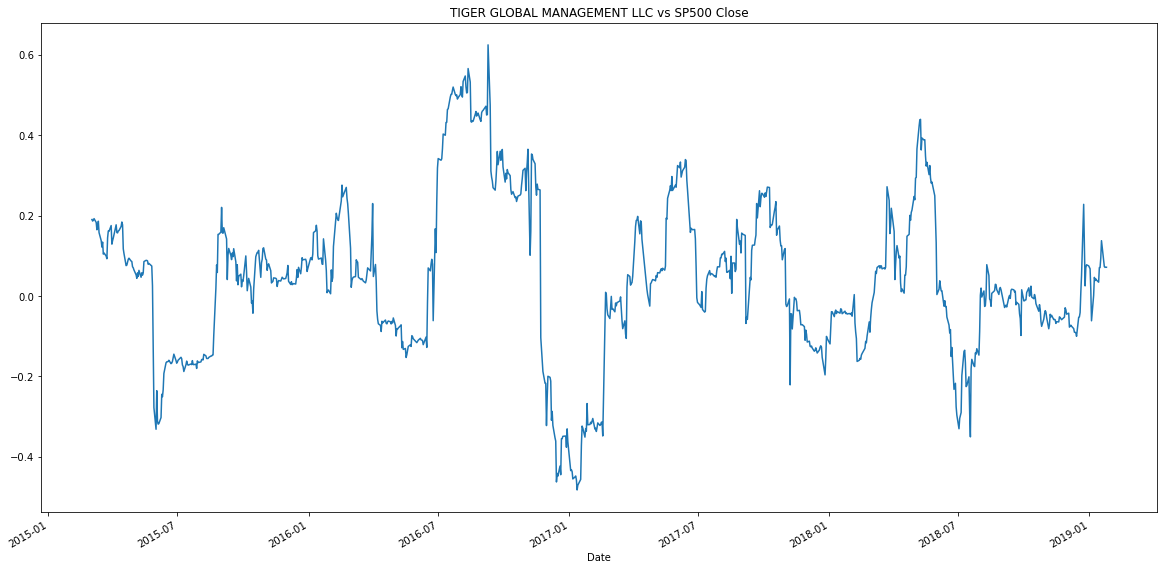

In [61]:
rolling_beta = cov_rolling/var_rolling
rolling_beta.plot(figsize=(20,10), title='TIGER GLOBAL MANAGEMENT LLC vs SP500 Close')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

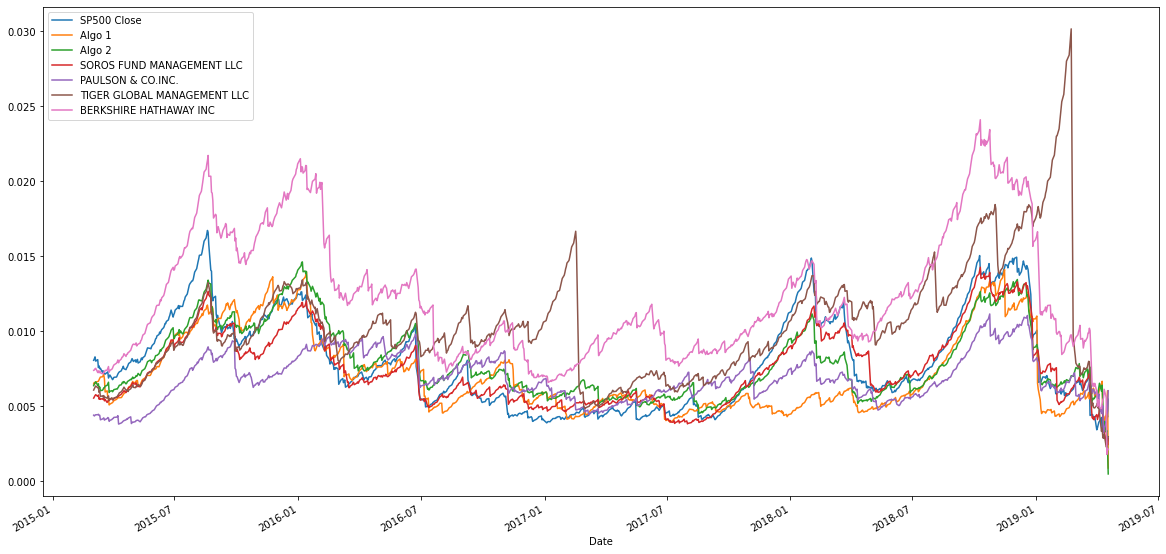

In [62]:
# Use `ewm` to calculate the rolling window
bigdf.ewm(halflife=21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [64]:
# Annualized Sharpe Ratios
sharp_ratio = (bigdf.mean() * 252)/(bigdf.std() * np.sqrt(252))
sharp_ratio

SP500 Close                   -0.518582
Algo 1                         1.369589
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
dtype: float64

<AxesSubplot:>

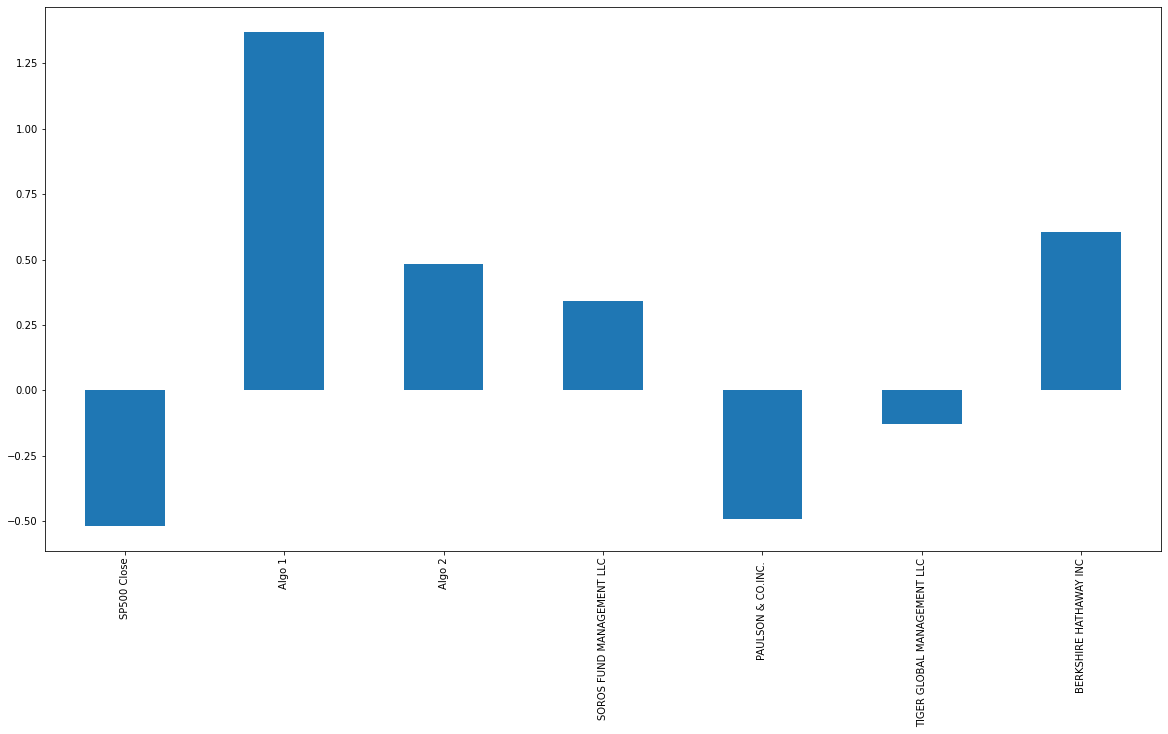

In [66]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio.plot(kind=('bar'), figsize=(20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [93]:
#GOOG stock
google_csv = '../Homework/Resources/goog_historical.csv'
google = pd.read_csv(google_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
google.rename(columns={'Symbol': 'Google','NOCP': 'GOOG'}, inplace = True)
google.drop(columns=['Google'], axis=1, inplace=True)

In [99]:
#AAPL stock
apple_csv = '../Homework/Resources/aapl_historical.csv'
apple = pd.read_csv(apple_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
apple.rename(columns={'Symbol': 'Apple','NOCP': 'AAPL'}, inplace = True)
apple.drop(columns=['Apple'], axis=1, inplace=True)

In [100]:
#COST stock
cost_csv = '../Homework/Resources/cost_historical.csv'
cost = pd.read_csv(cost_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
cost.rename(columns={'Symbol': 'Costco','NOCP': 'COST'}, inplace = True)
cost.drop(columns=['Costco'], axis=1, inplace=True)

In [101]:
# Combine all stocks in a single DataFrame
bigdf2 = pd.concat([google, apple, cost], axis='columns', join='inner')
bigdf2

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


In [102]:
# Reset Date index
bigdf2.sort_index(inplace=True)
bigdf2.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [111]:
# Calculate daily returns
bigdf2.dropna()
bigdf2.drop_duplicates()

bigdf2_daily_returns = bigdf2.pct_change()
bigdf2_daily_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479


In [112]:
# Drop NAs
bigdf2_daily_returns.dropna()
bigdf2_daily_returns.drop_duplicates()
bigdf2_daily_returns.isnull().sum()
# Display sample data
bigdf2_daily_returns.head

<bound method NDFrame.head of                 GOOG      AAPL      COST
Trade DATE                              
2018-05-11       NaN       NaN       NaN
2018-05-14  0.001766 -0.002333  0.000613
2018-05-15 -0.019060 -0.009088 -0.002042
2018-05-16  0.002354  0.009333  0.016523
2018-05-17 -0.002940 -0.006324  0.004479
...              ...       ...       ...
2019-05-03  0.019602  0.012431  0.007953
2019-05-06  0.003366 -0.015443 -0.001594
2019-05-07 -0.012855 -0.026957 -0.016583
2019-05-08 -0.006669  0.000197  0.004830
2019-05-09 -0.003335 -0.010744  0.008826

[250 rows x 3 columns]>

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [115]:
# Set weights
weights = [1/3, 1/3, 1/3]
port_returns = bigdf2_daily_returns.dot(weights)

# Calculate portfolio return
Custom = pd.DataFrame(port_returns)
# Display sample data
Custom.head()

,0
Trade DATE,
2018-05-11,NaN
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [147]:
# Join your returns DataFrame to the original returns DataFrame
combined3 = pd.concat([port_returns, bigdf], axis='columns', join='inner')
combined3.rename(columns={0: 'Custom'}, inplace=True)
combined3.head()

,Custom,SP500 Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
2018-05-11,NaN,-0.000883,0.000358,0.000281,-0.004717,0.000982,0.002624,-0.004125
2018-05-14,0.000015,0.006889,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000
2018-05-15,-0.010064,-0.004044,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606
2018-05-16,0.009403,0.000857,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310
2018-05-17,-0.001595,0.002639,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140


In [148]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined3.dropna(inplace=True)
combined3.isnull().sum()
combined3.sort_index()
combined3.head()
#combined3.isnull().sum()

,Custom,SP500 Close,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
2018-05-14,0.000015,0.006889,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000
2018-05-15,-0.010064,-0.004044,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606
2018-05-16,0.009403,0.000857,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310
2018-05-17,-0.001595,0.002639,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140
2018-05-18,-0.006061,-0.007333,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [149]:
# Calculate the annualized `std`
combined3.std()
annualized2 = (combined3.var()*252)
annualized_std_2 = np.sqrt(annualized2)
annualized_std_2

Custom                         0.211627
SP500 Close                    0.152469
Algo 1                         0.133927
Algo 2                         0.139499
SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Window'}>

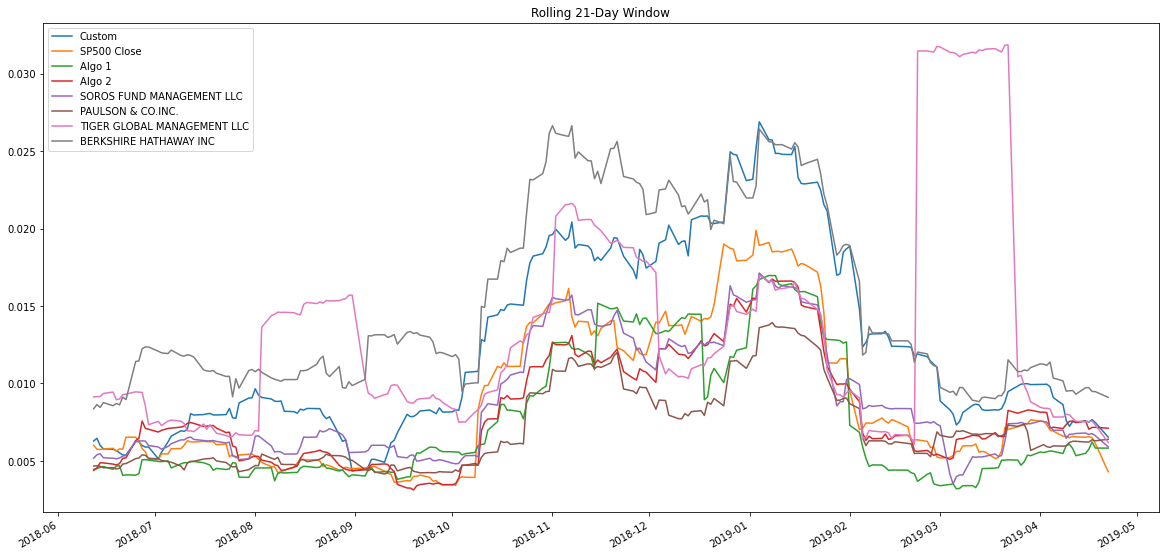

In [150]:
# Calculate rolling standard deviation
combined3.rolling(window=21).std().plot(figsize=(20,10), title='Rolling 21-Day Window')
# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

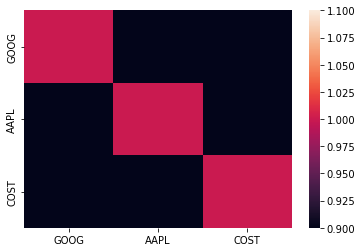

In [151]:
# Calculate and plot the correlation
correlation2 = bigdf2.corr()
sns.heatmap(correlation2, vmin=1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Mine VS Yours'}>

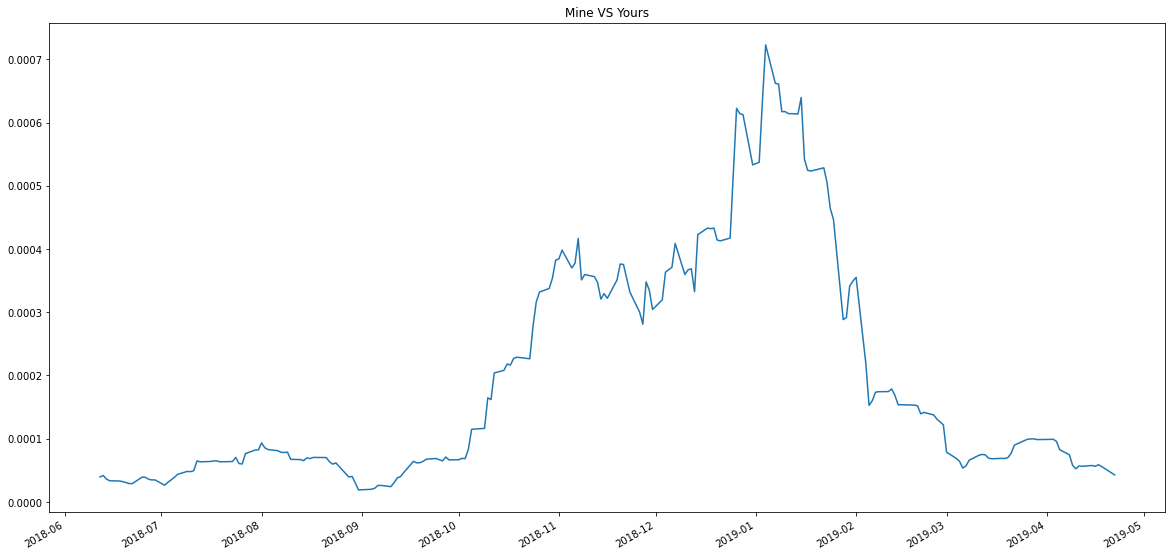

In [155]:
# Calculate and plot Beta
rolling_variance3 = combined3['Custom'].rolling(window=21).var()
rolling_covariance3 = combined3['Custom'].rolling(window=21).cov(combined3['SP500 Close'])
rolling_beta3 = rolling_covariance3/rolling_variance3
rolling_variance3.plot(figsize=(20,10), title='Mine VS Yours')

In [156]:
# Calculate Annualized Sharpe Ratios
sharpe_all = combined3.mean()* 252/ ((combined3).std()*np.sqrt(252))
sharpe_all

Custom                         0.876152
SP500 Close                   -0.427676
Algo 1                         2.001260
Algo 2                         0.007334
SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio for All'}>

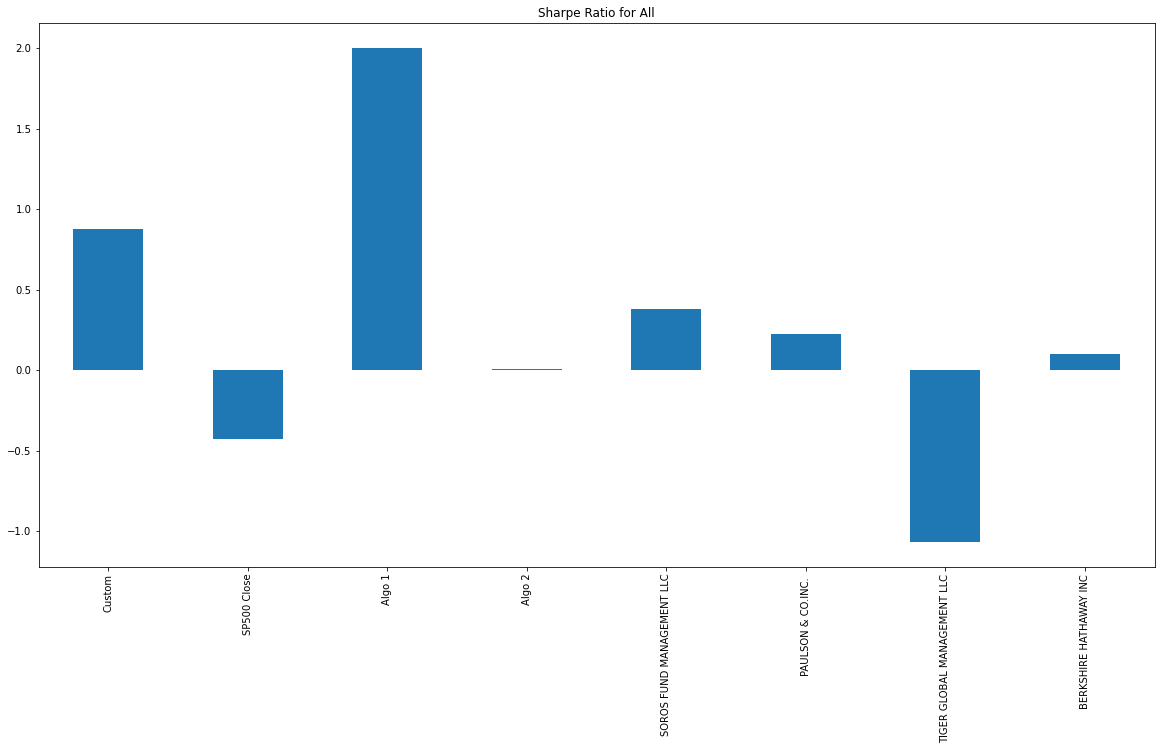

In [157]:
# Visualize the sharpe ratios as a bar plot
sharpe_all.plot(kind=('bar'), figsize=(20,10), title='Sharpe Ratio for All')

### How does your portfolio do?

Write your answer here!

In [159]:
print(f'If im reading and understanding this right my portfolio did a good deal better!!!')

If im reading and understanding this right my portfolio did a good deal better!!!
